<a href="https://colab.research.google.com/github/sajid-the-data-guy/linear_regression_project/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie budget project to predict the revenue


# problem statement:
producer having money and want to invest money on movie name "zombie rise again 5"

1. 1)what will be the right budget to invest in this film?
2. 2)How much revenue will our movie make?

# DATA-set link
https://www.the-numbers.com/current/movie/budgets/budgets.php



1. cleaning the data 
2. deleting the movie name column, release date, and rank
3. removing the  $ character from the budget and revenue column



In [ ]:
#imported the data in google colab after cleaning the dataset
# path: content/cost_clean.csv

In [ ]:
#importing the required library
import pandas as pd
from pandas import DataFrame  
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [ ]:
#readind the csv file
data = pd.read_csv("/content/cost_clean.csv")
print(data)

      Production_Budget_USD  Worldwide_Gross_USD
0               425000000.0         2.783919e+09
1               306000000.0         2.058662e+09
2               300000000.0         9.634204e+08
3               300000000.0         8.796209e+08
4               275000000.0         1.084439e+09
...                     ...                  ...
5029                 7000.0         7.164400e+04
5030                 7000.0         9.000000e+02
5031                 6000.0         2.404950e+05
5032                 5000.0         1.338000e+03
5033                 1100.0         1.810410e+05

[5034 rows x 2 columns]


In [ ]:
#printing the type of our data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.describe()

,Production_Budget_USD,Worldwide_Gross_USD
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [ ]:
#32907838.63 average production budget
#95156849.38 average REVENUE 

In [ ]:
# X is holding the production budget
X = DataFrame(data, columns=['Production_Budget_USD'])
#y is holding the revenue 
Y = DataFrame(data, columns=['Worldwide_Gross_USD']) 

In [ ]:
print(X)

      Production_Budget_USD
0               425000000.0
1               306000000.0
2               300000000.0
3               300000000.0
4               275000000.0
...                     ...
5029                 7000.0
5030                 7000.0
5031                 6000.0
5032                 5000.0
5033                 1100.0

[5034 rows x 1 columns]


In [ ]:
print(Y)

      Worldwide_Gross_USD
0            2.783919e+09
1            2.058662e+09
2            9.634204e+08
3            8.796209e+08
4            1.084439e+09
...                   ...
5029         7.164400e+04
5030         9.000000e+02
5031         2.404950e+05
5032         1.338000e+03
5033         1.810410e+05

[5034 rows x 1 columns]


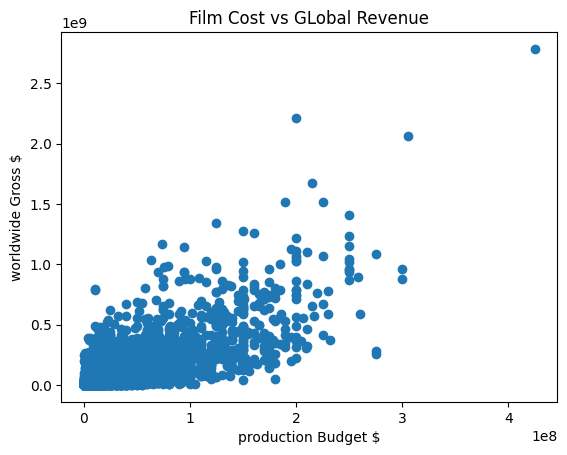

In [ ]:
plt.scatter(X, Y)
plt.title('Film Cost vs GLobal Revenue')
plt.xlabel('production Budget $')
plt.ylabel('worldwide Gross $')
plt.show()

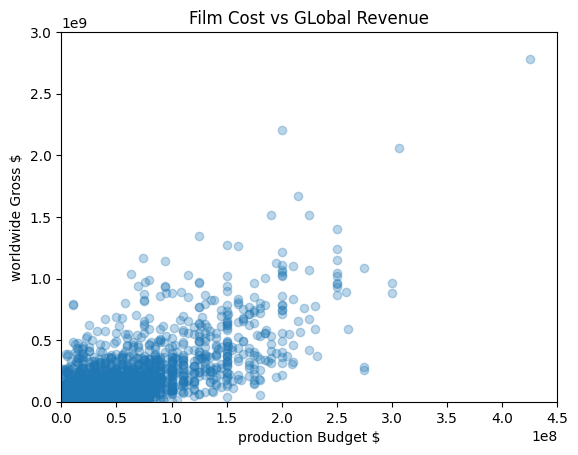

In [ ]:
#adding transparency to the chart
plt.scatter(X, Y, alpha=0.3)
plt.title('Film Cost vs GLobal Revenue')
plt.xlabel('production Budget $')
plt.ylabel('worldwide Gross $')
#removing the empty space from the chart
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

# Linear Regression implementation
### goal: our linear regression is going to calculate the line and minimize the residual in the chart

In [ ]:
regression = LinearRegression()
regression.fit(X,Y)
regression.coef_

array([[3.11150918]])

In [ ]:
#we got 3.1 it means
# for BUDGET 1$ WE CAN GET 3.1$ RETURNS AS REVENUE 

In [ ]:
regression.intercept_
#MOVIE WITH A BUDGET OF ZERO WILL LOSE 7236192$

array([-7236192.7291396])

In [ ]:
#predicting the revenue for a $50 million budget

# h0(x) = -7236192.7 + 3.1115 x
h = -7236192.7 + 3.1115*50000000
print(h)

148338807.3


In [ ]:
#if we invest $50 million means we can generate $148,338,807(140 million)
#finding the r2
regression.score(X, Y)

0.5496485356985727

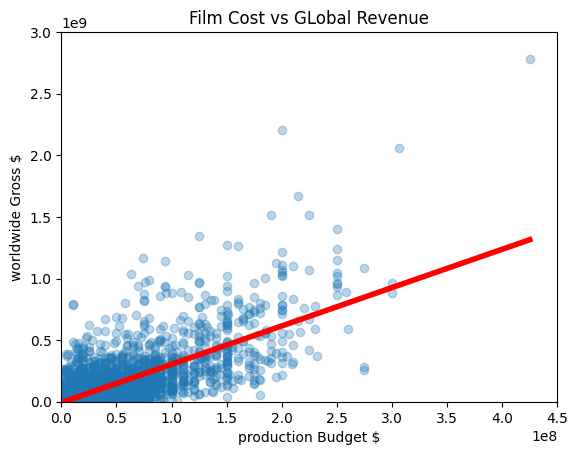

In [ ]:
#plotting the regression line in the graph

plt.scatter(X, Y, alpha=0.3)
plt.title('Film Cost vs GLobal Revenue')
plt.xlabel('production Budget $')
plt.ylabel('worldwide Gross $')
#plotting the line on predicted value
plt.plot(X, regression.predict(X), color='red', linewidth=4)
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()